## Ecole Superieure d'Informatique

#### Travail de maison

***Objectifs:***

    tester les modèles de representation de serie temporelle étudiés en classes afin d'assimiler leur fonctinnement sur les données du covid 19  

Libraires 

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('C:\\Users\\DELL\\Desktop\\serie_temporelle\\devoir')



Afficher les dates en français

In [68]:
import locale
locale.setlocale(locale.LC_TIME,'')

'French_Burkina Faso.1252'

**Presentation des données**

Il s'agit du jeu de donnée de covid 19 decrivant l'évolution chronologique journalière du nombre de cas de covid
du 10 decembre 2020 au 22 janvier 2023

***Chargement des donnees. Conversion de la colonne date en datetime et en index***

In [621]:
df = pd.read_excel("dataCovid19.xlsx", index_col="date",parse_dates=True)

#### Pretraitement et analyse de données

In [70]:
df.shape # dimension du dataset

(497, 1)

In [71]:
df.columns # liste des colonnes de la dataset

Index(['nombre'], dtype='object')

In [72]:
df.index.name # nom de l'index utilisée

'date'

In [73]:
df.info() # informations basics

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 497 entries, 2020-12-10 to 2023-01-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   nombre  497 non-null    int64
dtypes: int64(1)
memory usage: 7.8 KB


Il 491 enregistrement et un seul feacture (nombre). Les nombres de cas ont un type entier. Il n'a y a pas de valeur nulles

***Afficher les 5 premiers et derniers enregistrements***

In [74]:

df.head(5)

,nombre
date,
2020-12-10,139
2020-12-11,107
2020-12-12,109
2020-12-13,162
2020-12-14,54


In [75]:
df.tail(5)

,nombre
date,
2022-12-11,3
2022-12-25,2
2023-01-08,4
2023-01-15,2
2023-01-22,6


***Nous renomons la colonne "nombre" en nombre de cas "nbre_cas"***

In [623]:
df.rename(columns={'nombre':'nbre_cas'}, inplace=True)

***Apercu des stastistiques***

In [77]:
df.describe()

,nbre_cas
count,497.000000
mean,18.297787
std,35.405540
min,0.000000
25%,2.000000
50%,4.000000
75%,15.000000
max,238.000000


***Fonction de suppression des valeurs aberrentes, de normalisation et de denormalisation  des données***

In [8]:
def drop_series_outliers(serie):
    """
    Drop outliers from a pandas series.

    Args:
        serie (pd.Series): Series to drop outliers from.

    Returns:
        pd.Series: Series without outliers in it
    """
    q_1 = serie.quantile(0.25)
    q_3 = serie.quantile(0.75)
    iqr = q_3 - q_1  # Interquartile range
    low = q_1 - 1.5 * iqr
    high = q_3 + 1.5 * iqr

    return serie.loc[(serie > low) & (serie < high)]

def normalize(serie):
    return (np.array(serie) - serie.mean())/serie.std(), serie.mean(), serie.std()


def denormalize(serie, mean, std):
    return serie.multiply(std)+mean
    


In [79]:
df = pd.read_excel("dataCovid19.xlsx", index_col="date",parse_dates=True)

In [80]:
df

,nombre
date,
2020-12-10,139
2020-12-11,107
2020-12-12,109
2020-12-13,162
2020-12-14,54
...,...
2022-12-11,3
2022-12-25,2
2023-01-08,4


In [81]:
df["nombre"] ,mean, std = normalize(df.nombre)
df

,nombre
date,
2020-12-10,3.409134
2020-12-11,2.505320
2020-12-12,2.561808
2020-12-13,4.058749
2020-12-14,1.008379
...,...
2022-12-11,-0.432073
2022-12-25,-0.460317
2023-01-08,-0.403829


**Valeurs nulles**

In [82]:
df.isna().count()[0] - len(df)

0

Il n'y a pas de  valeurs nulles

***Valeurs Aberrantes***

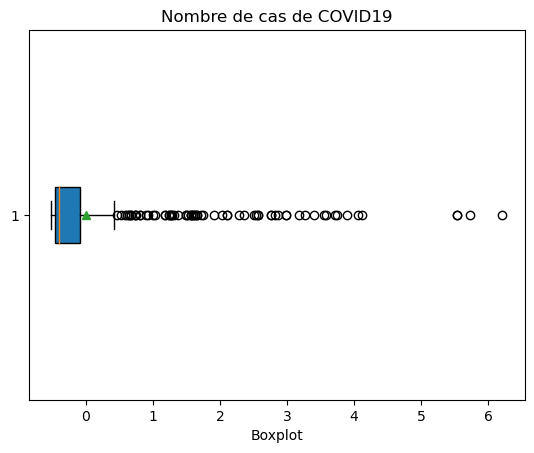

In [83]:
# Visualisation
plt.boxplot(df, vert=0, patch_artist=True, showmeans=True)
plt.title("Nombre de cas de COVID19")
plt.xlabel("Boxplot")
plt.show()

On remarque plusieurs valeurs aberrentes. Comme il s'agit d'un decompte du nombre de cas de covid et vu la taille du jeu de donnée que nous avons n'allons ni les supprimés ni les transformés.

**Calcul de statistiques**

Nous utiliserons principalement: resample()

***Nombre de cas par mois et par année***

In [625]:
df_mois = df.resample("M").sum()
df_mois = df_mois.set_index(df_mois.index.month)
df_mois= df_mois.set_index(df.resample("M").sum().index.month_name())
df_mois["annee"]=df.resample("M").sum().index.year
df_mois

,nbre_cas,annee
date,,
December,2124,2020
January,2786,2021
February,818,2021
March,420,2021
April,435,2021
May,93,2021
June,40,2021
July,72,2021
August,152,2021


C'est au mois de janvier 2021 que la maladie a touché le plus de personne suivie (au mois de decembre 2020). Il s'agit du debut de la maladie.

In [626]:
df_mois.iloc[df_mois.nbre_cas.argmax()]

nbre_cas    2786
annee       2021
Name: January, dtype: int64

C'est au mois de decembre 2022 que l'on a enregistré le moins de cas de covid 19 ***(9 cas)***, en octobre 2022 et janvier 2023. Plusieurs solutions de lutte et de prevention sont apparues

***Comparaison du nombre de cas de chaque mois par année***

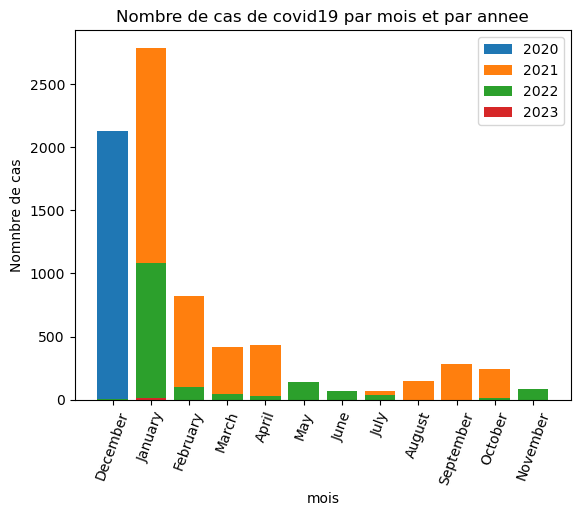

In [ ]:
plt.bar(df_mois[df_mois["annee"] == 2020].index,
        df_mois[df_mois["annee"] == 2020]["nbre_cas"])

plt.bar(df_mois[df_mois["annee"] == 2021].index,
        df_mois[df_mois["annee"] == 2021]["nbre_cas"])

plt.bar(df_mois[df_mois["annee"] == 2022].index,
        df_mois[df_mois["annee"] == 2022]["nbre_cas"])

plt.bar(df_mois[df_mois["annee"] == 2023].index,
        df_mois[df_mois["annee"] == 2023]["nbre_cas"])

plt.title("Nombre de cas de covid19 par mois et par annee")
plt.xlabel("mois")
plt.ylabel("Nomnbre de cas")
plt.xticks(rotation=70)

plt.legend((2020, 2021,  2022, 2023))
plt.show()

***Evolution moyen du nombre de cas par mois***

In [ ]:
df_cas_moyen = df.resample("M").mean()
df_cas_moyen

,nbre_cas
date,
2020-12-31,96.545455
2021-01-31,89.870968
2021-02-28,29.214286
2021-03-31,13.548387
2021-04-30,15.000000
2021-05-31,3.100000
2021-06-30,1.379310
2021-07-31,2.322581
2021-08-31,5.066667


***Le nombre de cas moyen les plus significatifs: >50***

In [ ]:
df_cas_moyen[df_cas_moyen["nbre_cas"]>50]

,nbre_cas
date,
2020-12-31,96.545455
2021-01-31,89.870968
2022-01-31,72.266667


***Visualisation de l'evolution moyenne de la maladie par mois***

<AxesSubplot:title={'center':'Evolution moyenne de cas par mois'}, xlabel='date', ylabel='nombre de cas'>

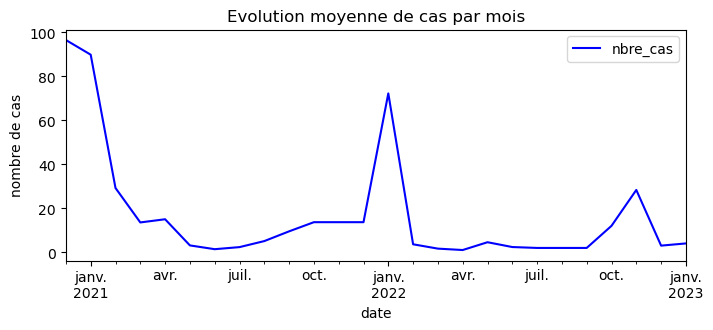

In [ ]:
df.resample("M").mean().ffill().plot(figsize=(8,3),
                        title='Evolution moyenne de cas par mois',
                        ylabel='nombre de cas', color='b')

Dans c'est premier mois, elle faisait beaucoup de victime. Mais en 2021 le nombre de victime à considerablement dimunié tendant à s'annuler. On note quelques irrégularrités dans cette dimunition notamment en decembre 2021 et nombre de 2023 ou on assite a une explosion de la maladie.

***Proportion de victime par année***

In [ ]:
df_annee = pd.DataFrame({})
df_annee["nbre_cas"]=df.resample('A').sum()
df_annee = df_annee.set_index(df.resample('A').sum().index.year)
df_annee

,nbre_cas
date,
2020,2124
2021,5347
2022,1611
2023,12


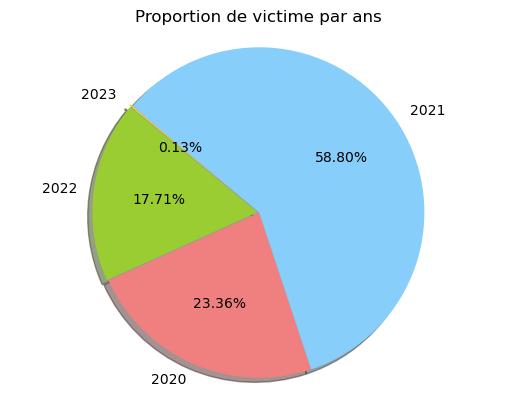

In [ ]:
# visualisation annuelle
labels =["2023","2022","2020","2021"]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.02, 0.01, 0, 0) # explode 1st slice

# Plot
nbre_cas_annee = df_annee.sort_values(by="nbre_cas", ascending=True)["nbre_cas"]

plt.pie(nbre_cas_annee, explode=explode, autopct='%0.2f%%',
        labels=labels, colors=colors, shadow=True, startangle=140)

plt.title("Proportion de victime par ans")
plt.axis('equal')
plt.show()

<AxesSubplot:title={'center':'Evolution du Nombre de cas par ans'}, xlabel='Annee', ylabel='nbre de cas'>

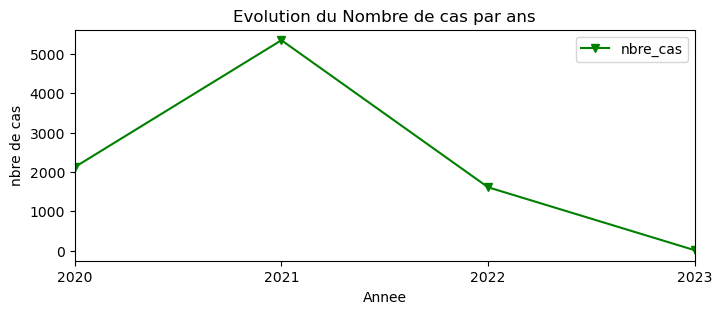

In [ ]:
df.resample('A').sum().plot(figsize=(8, 3), xlabel="Annee", 
                marker="v", ylabel="nbre de cas", color="green",
                title="Evolution du Nombre de cas par ans")

Cette figure répresente l'evolution par année du nombre de cas de covid19. On constacte que le nombre de personne touché par la maladie était considerablement élévé en 2020 (plus de 2000 cas ). Ensuit on assite à une forte croissance de l'infection  jusqu'en 2021, presque le double. Enfin le nombre de cas diminue de façon brusque à partir de 2022 de façon plus lent tendant à s'annuler en 2023.

***Pourcentage de croissance hebdomadaire de la maladie***

<AxesSubplot:xlabel='date'>

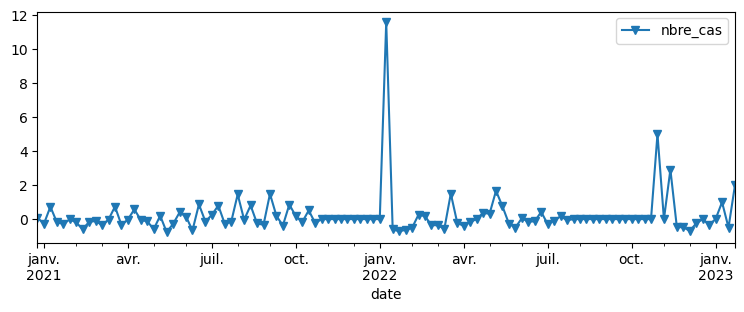

In [ ]:
df.resample('W').mean().pct_change().iloc[2:].plot(marker="v",figsize=(9,3))

Ces observations pourais s'expliquer par l'abscence de vaccin et de mesures preventives adéquates pour lutter contre la maladie dès son apparution. Donc il s'en est suivie une explosion du nombre de cas jusqu'en 2021. Par la suit, l'apparution des mesures de prevention efficases tel que le port de masque, le lavage des mains et le vaccin ont permis de reduire le nombre d'infection.

***Normalisation des données***

In [ ]:
# normalisation des données
df["nbre_cas"], mean, std = normalize(df.nbre_cas)
df

,nbre_cas
date,
2020-12-10,3.409134
2020-12-11,2.505320
2020-12-12,2.561808
2020-12-13,4.058749
2020-12-14,1.008379
...,...
2022-12-11,-0.432073
2022-12-25,-0.460317
2023-01-08,-0.403829


#### Visualisation de la serie

**Cette serie chronologique que nous étudions n' a qu'une seule variable. Il s'agit d'une serie temporelle univariée**

<AxesSubplot:title={'center':'evolution du nombre de cas de covid en fonction du temps'}, xlabel='date', ylabel='nombre de cas'>

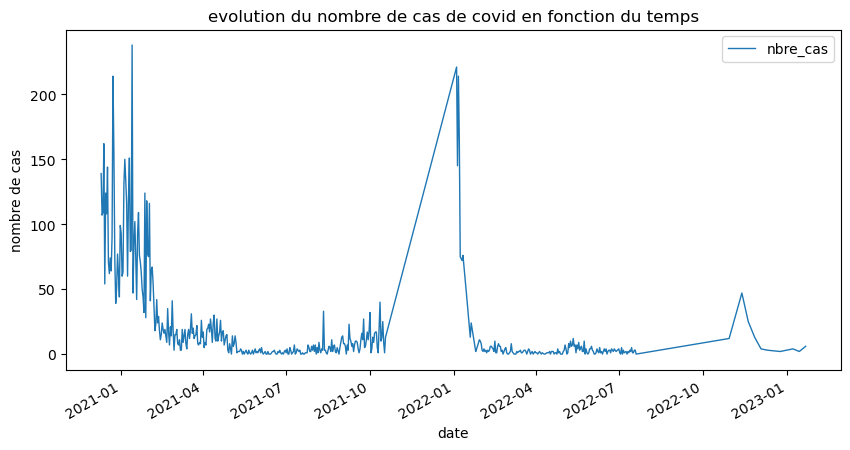

In [ ]:

df.plot(figsize=(10, 5),linewidth=1, 
        title="evolution du nombre de cas de covid en fonction du temps", 
        ylabel="nombre de cas")

***Premiéres impressions***

Il semblerait que cette serie contient deux tendances: une tendance décroissante et une tendance linéaire. Il n' y a pas de saisonnalité. Le nombre de cas était considerablement élévé au debut de la maladie mais a diminué  au cours du temps tendant à s'annuler. Par ailleurs, on remarque quelques irrégularités notamment en 2021 avec une explosion fligurante du nombre de cas et en 2023 ou on note une legére hausse par rapport à 2022. Ces fluctions accidentelles pourraient d'être expliquées par les mutations de la maladie et l'inexistance de méthodes preventives efficaces en 2021 et la dimunition des mesures préventives en 2023.

***Identifier les tendances dans la serie grâce au rolling***

Roulement de la serie sur une fenetre de 30 jours

<AxesSubplot:title={'center':'Roulement de la serie sur une fenetre de 30 jours'}, xlabel='date', ylabel='nombre de cas'>

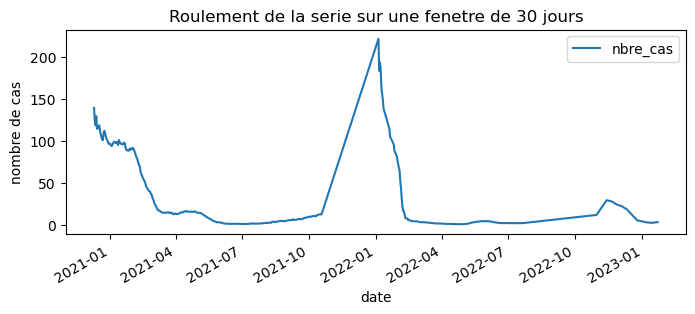

In [ ]:
df.rolling('30D').mean().plot(figsize=(8,3), title="Roulement de la serie sur une fenetre de 30 jours",
                            ylabel="nombre de cas")

***Roulement de la serie sur une fenetre de 100 jours***

<AxesSubplot:title={'center':'Roulement de la serie sur une fenetre de 30 jours'}, xlabel='date', ylabel='nombre de cas'>

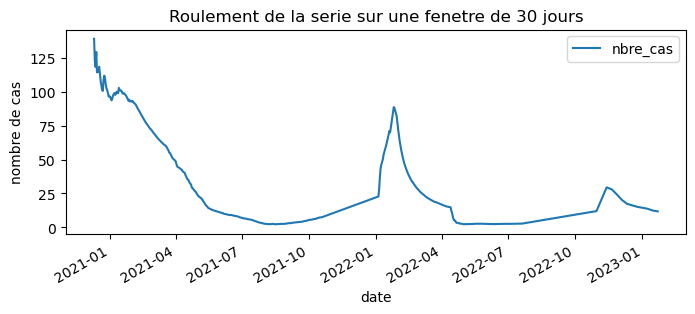

In [ ]:
df.rolling('100D').mean().plot(figsize=(8,3), title="Roulement de la serie sur une fenetre de 30 jours",
                            ylabel="nombre de cas")

***Roulement de la serie sur une fenetre de 365 jours***

<AxesSubplot:title={'center':'Roulement de la serie sur une fenetre de 1 ans'}, xlabel='date', ylabel='nombre de cas'>

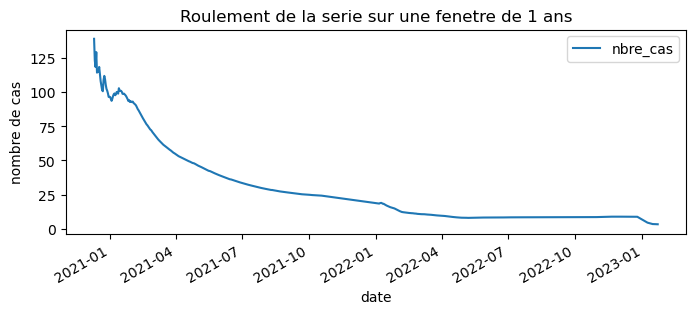

In [ ]:
df.rolling('365D').mean().plot(figsize=(8,3), title="Roulement de la serie sur une fenetre de 1 ans",
                            ylabel="nombre de cas")

L'observation de ces trois figures nous permet de conclure qu'il s'agit d'une serie possédant une **tendance** **decroisante**. Le nombre de cas de covid19 décroit au cours du temps. Il existe cependant une augmentation accidentale en  2021. 

***Conlusion***

Il s'agit d'une serie décrit une ***serie temporelle univarié à une tendance décroisante sans saisonnalité***

### Implementation des indices descriptifs d'une serie temporelle

In [ ]:
#calcule des la moyen

def moyen(serie):
    """
        Calcul moyenne d'une serie
        Args: 
            Serie (pd.Series): serie que l'on veut calculer la moyenne
        Returns:
            mean(serie)
    """
    n = len(serie)
    return 1/n * np.sum(serie)

#variance et ecart type
def variance_ecart_type(serie):
    """
        Calcul les indices de dispersion (Variance et ecart type) d'une serie temporelle
        Args:
            Serie (pd.Series): serie que l'on veut calculer la variance et l'ecart type
        Returns:
            tuple(variance, ecart_type)
    """
    
    n = len(serie)
    xt = np.array(serie["nbre_cas"])
    moy  = moyen(xt) # moyen de xt
    v = 1/n * np.sum((xt-moy)**2) # variance
    
    return ( v, np.sqrt(v)) 

def auto_covariance(serie, ordre):
    """
        Calcul l'auto covariance d'une serie temporaire
    Args:
        serie(pd.Series): serie que l'on veut calculer l'auto covariance
        ordre (integer): indique l'ordre de l'auto correlation calcule
    Returns:
        float: l'auto correlation
    """
    n = len(serie)
    xt = np.array(serie["nbre_cas"])
    moy =  moyen(xt)

    def sum_ecartXt_Moy():
        """ Partie de somme de formule d'auto covariance"""
        t = len(serie) - ordre
        result = 0

        for i in range(t+1):
            try:
                result += (xt[i]-moy) - (xt[i+1]-moy)
            except IndexError:
                pass
        return result
    return ((1/(n-ordre)) * sum_ecartXt_Moy())

def auto_correlation(h,serie):
    """
        Calcul de l'auto correlation
    Args:
        h (int): ordre de l'auto correlation
        serie (pd.Series): serie dont on calcul l'auto correlation
    Returns:
        float: l'auto correlation
    """
    return auto_covariance(serie,h)/auto_covariance(serie,0)

**test**

moyen

In [ ]:
moyen(df.nbre_cas)

18.297786720321934

***Ecart type + variance***

In [ ]:
# il y a une très forte repartion autour de la moyenne
variance_ecart_type(df)

(1251.0300353428418, 35.36990295919458)

***Auto-covariance***

In [ ]:
auto_covariance(df,ordre=2)


0.2686868686868687

***Auto-Corelation***

In [ ]:
auto_correlation(h=2,serie=df)
# il y a une forte correlation entre le nombre de cas de covid19 separé de deux temps 

1.0040404040404038

### Implementation des differents models de prevision d'une temporelle

1) Modèle de regression 
2) lissages exponentiels
3) les  modèies de type ARMA,

#### **Implementation manuelle**

**1. Modèle de regression**

***Librairies***

In [10]:
from scipy import optimize
from sklearn.metrics import mean_squared_error
pd.options.mode.chained_assignment = None # suppression des warning


***Fonction polynomiale***

In [90]:
def regression_model(a1, a2, a3, a4, t):
    """
        Model de regression polynomiale de degres 2
    Args:
        a1 (int): coefficient du modèle à predire par le modèle
        a2 (int): coefficient du modèle à predire par le modèle
        a3 (int): coefficient du modèle à predire par le modèle
        b (float-->[0,1]): le taux d'erreur
        t (np.array): le temps d'évolution de la maladie

    Returns:
        float: nombre de cas predit
    """
    return a4*t**3+a1*t**2+ a2*t+a3

***Fonction cout***

In [91]:
def loss_function(params:list, t, real):
    """
        Fonction de cout à optimiser: moindre carre
    Args:
        params (int):
        t (np.array): le temps d'évolution de la maladie
        real(pd.Serie): donnée real 
    Returns:
        float: erreur du modele 
    """
    predictions = regression_model(*params, t)
    return np.mean((np.array(real)-predictions)**2)

***Fonction permettant de trouver la combinaison de paramètre qui optimise la fonction cout du model***

In [93]:

def parametre_model(parametre_ply:list, df):
        
        error = []# stockage des resultats optimiser des parametres et de l'erreur de chaque couple
        
        for param in parametre_ply:
                        ### ---------- Entraitement ---------####
                df = pd.read_excel("dataCovid19.xlsx",
                                index_col="date",parse_dates=True)
                df.rename(columns={'nombre':'nbre_cas'}, inplace=True)

                # Separation des donnees en donnees test et en donnees entrainement: otrain <2023 & test==2023
                X_train, X_test =  df[(df.index.year<2023)],
                df[(df.index.year==2023)]

                # normalisation et generation du temps
                X_train["nbre_cas"], mean, std = normalize(X_train.nbre_cas)
                t =np.arange(len(X_train))

                result = optimize.minimize(loss_function,
                                        x0=param, args=(t, X_train))

                        ### ---------- Fin Entraitement ---------####
                # denormalisation des donnees d'entrainement pour l'affichage et le calcul de l'erreur
                X_train["nbre_cas"]= denormalize(X_train.nbre_cas, mean, std)

                # Recuperaton des données la prediction sur le X_train
                y_pred = pd.DataFrame({})
                y_pred["nbre_cas"] = regression_model(*list(result.x), t)
                y_pred = y_pred.set_index(X_train.index)

                # denormalisation des donnees de test pour l'affichage et le calcul de l'erreur
                y_pred["nbre_cas"] = denormalize(y_pred, mean, std)

                # calcul de l'erreur de chaque couple
                rmse = (np.sqrt(mean_squared_error(X_train, y_pred=y_pred)))

                error.append([rmse, result.x])
        return error, X_train,X_test, y_pred, t

***Paramètres du model a optimisé***

In [94]:
# valeur de (a1,a2,a3,a4) pour tester le modele polynomile
parametre_ply = [
    (0.78,0.96,0.10,0.10),
    (0.69,0.94,0.77,0.40),
    (0.60,np.pi,0.01,0.64),
    (0.14,0.93,0.81,0.76),
    (0.18,0.09,0.80,0.29),
    (1/np.exp(0.70),np.pi,0,0.64),
    ]

error, X_train, X_test, y_pred, t = parametre_model(parametre_ply, df)
error


[[184.75949679684427,
  array([ 1.23953730e-03, -1.97377492e-01,  2.28617259e+00, -1.83457144e-06])],
 [184.74493501620867,
  array([ 1.27150904e-03, -2.05268132e-01,  2.80505736e+00, -1.87035719e-06])],
 [96.98405307227725,
  array([-4.13078884e-05,  4.30639077e-02, -3.64856647e+00, -1.05286578e-07])],
 [1072.0846045078436,
  array([ 8.30176727e-03, -1.96505461e+00,  1.21516893e+02, -1.01065891e-05])],
 [191.07927585105628,
  array([ 1.58201307e-03, -2.81218008e-01,  7.79622722e+00, -2.24365891e-06])],
 [1399.4858841627251,
  array([-8.21033483e-03,  2.13955135e+00, -1.52321922e+02,  9.32095576e-06])]]

***Index du meilleur couple de parametres obtimisant mon model***

In [96]:
# sourcery skip: avoid-builtin-shadow
min = error[0][0]

for i, result in enumerate(error):
    if result[0]>min :
        min = result[0]
        mini_index = i
mini_index

5

***Prediction avec les meilleurs paramètres***

In [97]:
y_pred["nbre_cas"] = np.abs(regression_model(*list(error[mini_index][1]), t))


***Visualisation de la du modéle***

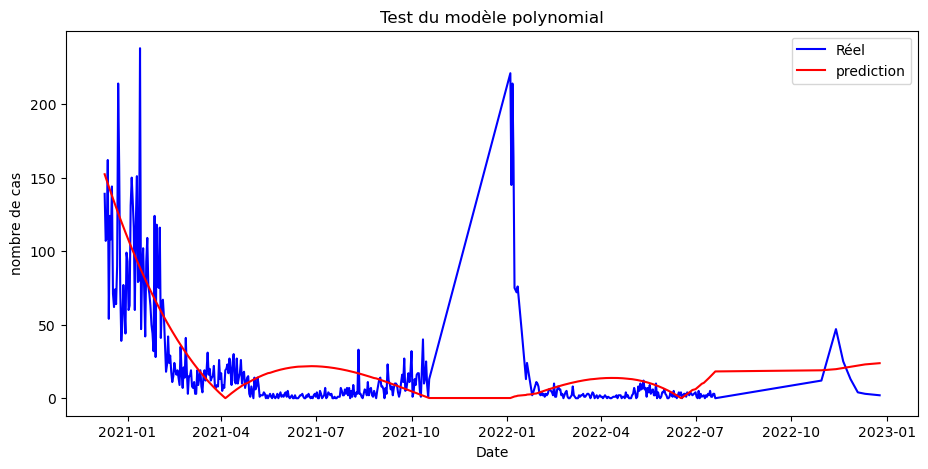

In [104]:
plt.figure(figsize=(11,5))
plt.plot(X_train.index, X_train, color='b')
plt.plot(y_pred.index, y_pred, color='r')

plt.title("Test du modèle polynomial")
plt.xlabel("Date")
plt.ylabel("nombre de cas")

plt.legend(("Réel", "prediction"))
plt.show()

Après plusieurs tentatives de variation des paramètres de regression du model polynomial, ce modèle est le meilleur obtenu. Il ne suit pas le phenoméne de covid19. 
En utilisant un polynome à partir de degre 5 on obient également un mauvais modele qui sur-apprend. Pour les polynomes de degres inferieurs à 4 on obtient un sous-apprentissage. c'est la valeur absolue des resultats de prediction de ce modèle  qui permettent d'obtenir ce resultat.

***Test du modèle sur les données Test***

In [ ]:
# test du model pour les données de test
X_test

,nbre_cas
date,
2023-01-08,4
2023-01-15,2
2023-01-22,6


In [101]:
t = np.array(list(range(len(X_train), len(df))))

In [105]:
regression_model(*list(error[mini_index][1]), t)

array([24.67566094, 25.5329604 , 26.40152243])

***Conclusion***

L'utilisation d'un modèle de polynomiale sur les données de covid 19 donne un mauvais resultat. Il très difficile à la main à entrainer (fournir les paramètres dont l'optimisation fournira un meilleur resultat) 

**Enregistrement des performances dans le tableau de comparaison des modèles**

In [130]:
#Creation du tableau de comparaison des modeles
tab_comparaison = pd.DataFrame()
new_row = pd.Series(data={'modele':'polynomial',
                        'error':error[mini_index][0]})

tab_comparaison = tab_comparaison.append(new_row, ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14228\2464992125.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_comparaison = tab_comparaison.append(new_row, ignore_index=True)


**2. Modèle de lissage exponentiel simple**

***Fonctions***

In [108]:
def lissage_exp_simple(observation_data ,alpha):
    n = len(observation_data)
    donnee_lisse = [observation_data[0]]

    for t in range(1, n):
        donnee_lisse.append(
            alpha * observation_data[t-1]  + (1-alpha)**t * donnee_lisse[t-1]
            )

    return np.array(donnee_lisse)

***Entrainement***

Initialisation de la liste des paramètres aplha 

In [109]:
alphas = np.arange(0,1,0.1)

In [110]:

error = []# stockage des resultats optimiser des parametres et de l'erreur de chaque couple

for alpha in alphas:

        ### ---------- Entraitement ---------####
    df = pd.read_excel("dataCovid19.xlsx",
                    index_col="date",parse_dates=True)
    df.rename(columns={'nombre':'nbre_cas'}, inplace=True)

    # Separation des donnees en donnees test et en donnees entrainement: otrain <2023 & test==2023
    # X_train, X_test =  df[(df.index.year<2023)], df[(df.index.year==2023)]
    X_train = df[:'2022-06-01']
    X_test = df['2022-06-01':]

    # normalisation et generation du temps
    X_train["nbre_cas"], mean, std = normalize(X_train.nbre_cas)
    
    # Recuperaton des données la prediction sur le X_train
    y_pred = pd.DataFrame({})
    y_pred["nbre_cas"] = lissage_exp_simple(X_train.nbre_cas, alpha)
    y_pred = y_pred.set_index(X_train.index)

        ### ---------- Fin Entraitement ---------####
    # denormalisation des donnees d'entrainement pour l'affichage et le calcul de l'erreur
    X_train["nbre_cas"]= denormalize(X_train.nbre_cas, mean, std)

    # denormalisation des donnees de test pour l'affichage et le calcul de l'erreur
    y_pred["nbre_cas"] = denormalize(y_pred, mean, std)

    # calcul de l'erreur de chaque couple
    rmse = (np.sqrt(mean_squared_error(X_train, y_pred=y_pred)))

    error.append([alpha, rmse])



***Index du meilleur paramètre alpha obtimisant le model***

In [111]:
# la valeur minimun de l'erreur
# sourcery skip: avoid-builtin-shadow
min = error[0][1]
for i, result in enumerate(error):
    if result[1]<=min :
        min = result[1]
        mini_index = i

mini_index

8

***Prediction avec le meilleurs paramètre alpha***

In [112]:
# visualisation de prediction pour apla mininal

# normalisation et generation du temps
X_train["nbre_cas"], mean, std = normalize(X_train.nbre_cas)

#  prediction
y_pred = pd.DataFrame({})
y_pred["nbre_cas"] = lissage_exp_simple(X_train.nbre_cas,
                                    alpha=error[mini_index][0])
y_pred = y_pred.set_index(X_train.index)

***Denormalisation des données pour l'affichage***

In [113]:
# Denormalisation pour affichage
X_train["nbre_cas"]= denormalize(X_train.nbre_cas, mean, std)
y_pred["nbre_cas"] = denormalize(y_pred, mean, std)

***Visualisation de la du modéle***

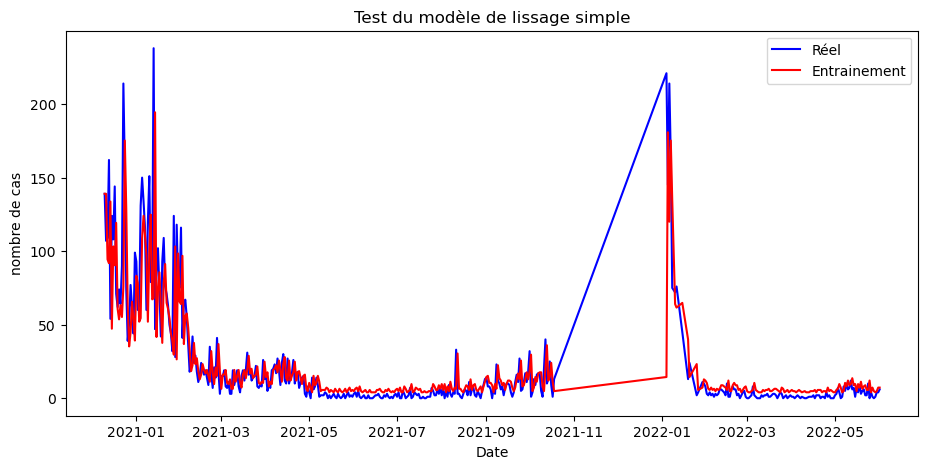

In [116]:
plt.figure(1,figsize=(11,5))
plt.plot(X_train.index, X_train, color='b')
plt.plot(y_pred.index, y_pred, color='r')

plt.title("Test du modèle de lissage simple")
plt.xlabel("Date")
plt.ylabel("nombre de cas")

plt.legend(("Réel", "Entrainement"))
plt.show()

Ce modèle est très convainquant à l'entrainement. Il donne bon résultat par rapport à la première. Il semblabe être répresentative du phénomène de covid 19.

***Test du modèle sur les données Test***

In [ ]:
# Test du modele
# Normalisation
X_test["nbre_cas"], mean, std = normalize(X_test.nbre_cas)

***prediction sur les données Test avec le meilleur alpha***

In [117]:
y_pred = pd.DataFrame({})
y_pred["nbre_cas"] = lissage_exp_simple(
    X_test.nbre_cas, alpha=error[mini_index][0])

y_pred = y_pred.set_index(X_test.index)


***Denormalisation pour affichage***

In [118]:
y_pred["nbre_cas"]= denormalize(y_pred.nbre_cas, mean, std)
X_test["nbre_cas"]= denormalize(X_test.nbre_cas, mean, std)


In [119]:
X_test[:'2022-06-06']

,nbre_cas
date,
2022-06-01,242.777284
2022-06-02,131.455536
2022-06-03,94.348286
2022-06-04,20.133787
2022-06-05,20.133787
2022-06-06,57.241036


In [120]:
y_pred[:'2022-06-06']


,nbre_cas
date,
2022-06-01,242.777284
2022-06-02,242.777284
2022-06-03,118.096926
2022-06-04,80.289091
2022-06-05,20.230035
2022-06-06,20.133818


***Visualisation de la prediction***

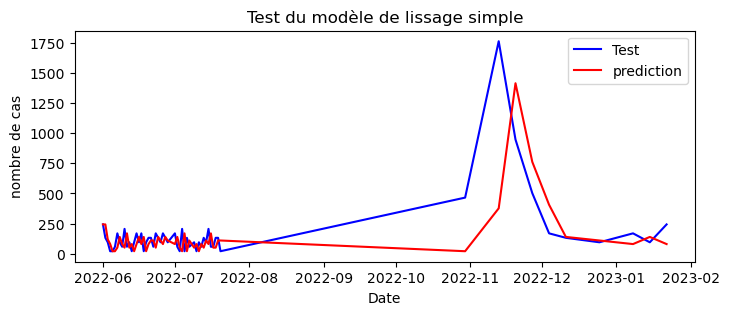

In [127]:
plt.figure(1,figsize=(8,3))
plt.plot(X_test.index, X_test, color='b')
plt.plot(y_pred.index, y_pred, color='r')

plt.title("Test du modèle de lissage simple")
plt.xlabel("Date")
plt.ylabel("nombre de cas")

plt.legend(("Test", "prediction"))
plt.show()

La modéle suit plus ou moins nos données de test. Il est très convainquent. On peux dire que c'est le meilleur modèle que nous avons obtenu pour l'instant

***Ajout des performance dans le tableau de comparaison***

In [131]:
new_row = pd.Series(data={'modele':'exp_manuel_simple',
                        'error':error[mini_index][1]})

tab_comparaison = tab_comparaison.append(new_row, ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14228\2021740844.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_comparaison = tab_comparaison.append(new_row, ignore_index=True)


**Conclusion**

Le modèle de lissage exponentiel simple est un modèle très performant. Il décrit très bien le phénomène de covid19. Il est plus performant par rapport à la prémière.

**3. Lissage exponentil double**

***Fonction***

In [36]:
def lissage_exp_double(serie, alpha, beta):
    niveaux = [serie[0]]
    tendance = [serie[1]-serie[0]]
    
    for i in range(1, len(serie)):
        # calcul de la composante niveau grâce à la formule
        nivo = alpha * serie[i] + (1-alpha) * (niveaux[i-1] + tendance[i-1])
        niveaux.append(nivo)
        
        # calcul de la composante tendance 
        tend = beta * (nivo - niveaux[i-1]) + (1-beta)*tendance[i-1]
        tendance.append(tend)
    
    return np.array(niveaux) + np.array(tendance)

***Entrainement***

Paramètre alpha et beta à faire varier

In [117]:
alphas = np.arange(0,1,0.1)
betas = np.arange(0,1,0.1)

In [118]:


error = []# stockage des resultats optimiser des parametres et de l'erreur de chaque couple

for alpha in alphas:

    for beta in betas:
            ### ---------- Entraitement ---------####
        df = pd.read_excel("dataCovid19.xlsx", 
                        index_col="date",parse_dates=True)
        df.rename(columns={'nombre':'nbre_cas'}, inplace=True)

        # Separation des donnees en donnees test et en donnees entrainement: otrain <2023 & test==2023
        X_train = df[:'2022-06-01']
        X_test = df['2022-06-01':]

        # normalisation et generation du temps
        X_train["nbre_cas"], mean, std = normalize(X_train.nbre_cas)
        
        # Recuperaton des données la prediction sur le X_train
        y_pred = pd.DataFrame({})
        y_pred["nbre_cas"] = lissage_exp_double(
            X_train.nbre_cas, alpha, beta=beta)
        
        y_pred = y_pred.set_index(X_train.index)

            ### ---------- Fin Entraitement ---------####
        # denormalisation des donnees d'entrainement pour l'affichage et le calcul de l'erreur
        X_train["nbre_cas"]= denormalize(X_train.nbre_cas, mean, std)

        # denormalisation des donnees de test pour l'affichage et le calcul de l'erreur
        y_pred["nbre_cas"] = denormalize(y_pred, mean, std)

        # calcul de l'erreur de chaque couple
        rmse = (np.sqrt(mean_squared_error(X_train, y_pred=y_pred)))

        error.append([alpha,beta, rmse])

***Index des meilleurs paramètres***

In [119]:
# la valeur minimun de l'erreur
min = error[0][1]
for i, result in enumerate(error):
    if result[1]<=min :
        min = result[1]
        mini_index = i

mini_index

90

***Visualisation du modèle entrainement***

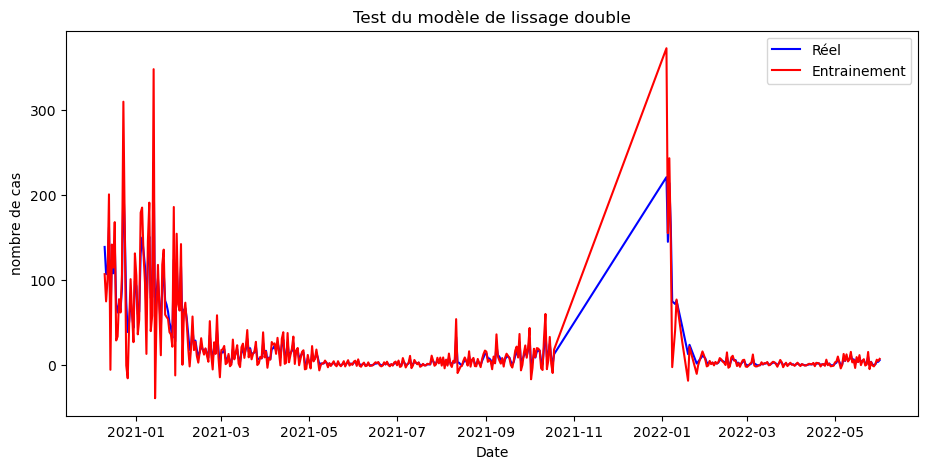

In [120]:
plt.figure(1,figsize=(11,5))
plt.plot(X_train.index, X_train, color='b')
plt.plot(y_pred.index, y_pred, color='r')

plt.title("Test du modèle de lissage double")
plt.xlabel("Date")
plt.ylabel("nombre de cas")

plt.legend(("Réel", "Entrainement"))
plt.show()

Le lissage exponentiel double suit plus au moins exatement le phénomène de covid 19. Cela ressemble à un sur-apprentissage

***Test du modèle sur les données Test***

In [121]:
# Test du modele
# Normalisation
X_test["nbre_cas"], mean, std = normalize(X_test.nbre_cas)

In [122]:
y_pred = pd.DataFrame({})
y_pred["nbre_cas"] = lissage_exp_double(X_test.nbre_cas,
                        alpha=error[mini_index][0], beta=error[mini_index][1])
y_pred = y_pred.set_index(X_test.index)
y_pred["nbre_cas"]= np.abs(denormalize(y_pred.nbre_cas, mean, std)) 
X_test["nbre_cas"]= denormalize(X_test.nbre_cas, mean, std)



Visualisation de la prediction sur les données de test

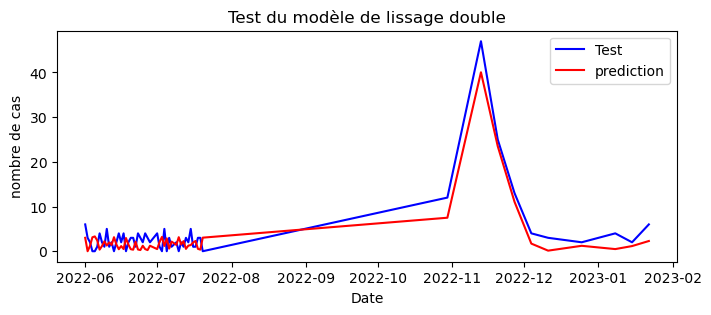

In [123]:
plt.figure(1,figsize=(8,3))
plt.plot(X_test.index, X_test, color='b')
plt.plot(y_pred.index, y_pred, color='r')

plt.title("Test du modèle de lissage double")
plt.xlabel("Date")
plt.ylabel("nombre de cas")

plt.legend(("Test", "prediction"))
plt.show()

Le lissage exponentiel double l'instar du lissage exponentiel simple fournis un très bon résultat. Il semble très plus adéquat pour ce problème par rapport au lissage exponentiel simple. 

***Ajout des performance dans le tableau de comparaison***

In [132]:
new_row = pd.Series(data={'modele':'exp_manuel_double', 'error':error[mini_index][1]})
tab_comparaison = tab_comparaison.append(new_row, ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14228\1863806770.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_comparaison = tab_comparaison.append(new_row, ignore_index=True)


***Conclusion***

Le modèle de lissage exponentiel double fournit le meilleur resultat pour la pediction du nombre cas de covid 19.

### Comparaison des méthodes implémentées

***Affichage du tableau des erreurs***

In [ ]:
tab_comparaison

,modele,error
0,polynomial,1399.485884
1,exp_manuel_simple,23.243324
2,exp_manuel_double,4.736399


***Visualisation de la comparaision***

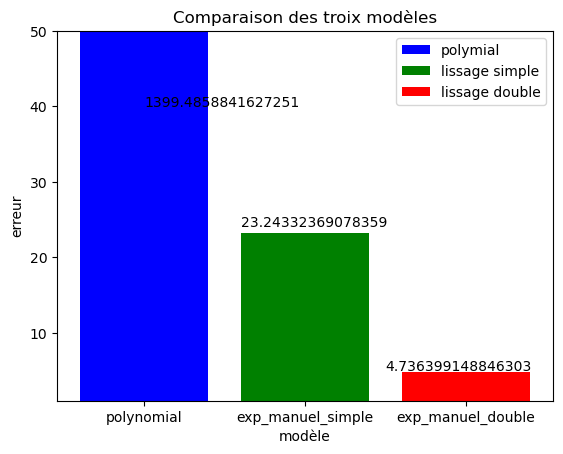

In [ ]:
plt.bar(tab_comparaison["modele"][0],tab_comparaison["error"][0], color="b")
plt.bar(tab_comparaison["modele"][1],tab_comparaison["error"][1], color="g")
plt.bar(tab_comparaison["modele"][2],tab_comparaison["error"][2], color='r')

plt.ylim(1, 50),
plt.title("Comparaison des troix modèles")
plt.xlabel("modèle")
plt.ylabel("erreur")
plt.legend(("polymial","lissage simple", "lissage double"))

plt.text(0,40, str(tab_comparaison["error"][0]))
plt.text(0.6,24, str(tab_comparaison["error"][1]))
plt.text(   1.5,5, str(tab_comparaison["error"][2]))

plt.show()

***Conclusion***

A l'issue de cette analyse d'implementation manuelle des modèles de prediction de serie chronologique, il ressort que le modèle de lissage exponentiel double est le plus performant. 

## Implementation à base de librairie

Nous implémenterons dans cette partie les modèles suivants:


1) lissages exponentiels
2) les  modèies de type ARMA,

Tableau de comparaison

In [520]:
tab_comparaison= pd.DataFrame({})

**1) Lissage  exponentiel**

Librairies

In [521]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing,SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error

***Chargement des données***

In [522]:
df = pd.read_excel("dataCovid19.xlsx", index_col="date",parse_dates=True)
df.rename(columns={'nombre':'nbre_cas'}, inplace=True)

***Division des données: en test et Entrainement***

In [523]:
X_train = df[:'2022-06-01']
X_test = df['2022-06-01':]

***Normalisation des données***

In [524]:
X_train["nbre_cas"], mean, std = normalize(X_train.nbre_cas)

***Entrainement avec different niveau alpha: 0.2, 0.6, None***

In [525]:
# Sans optimisation
fit1 = SimpleExpSmoothing(X_train).fit(smoothing_level=0.2,optimized=False)
fit2 = SimpleExpSmoothing(X_train).fit(smoothing_level=0.6,optimized=False)
fit3 = SimpleExpSmoothing(X_train).fit()

# Avec optimisation
fit4 = SimpleExpSmoothing(X_train).fit(smoothing_level=0.2,optimized=True)
fit5 = SimpleExpSmoothing(X_train).fit(smoothing_level=0.6,optimized=True)


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates

***Prediction sur tous les données test***

In [526]:
# Sans optimisation
#alpha=O.1
fcast1 = fit1.forecast(len(X_test)).rename(r'$\alpha=0.2$')
y_pred1 = pd.DataFrame({})
y_pred1["nbre_cas"] = fcast1
y_pred1 = y_pred1.set_index(X_test.iloc[0:len(X_test),:].index)

#alpha=0.6
fcast2 = fit2.forecast(len(X_test)).rename(r'$\alpha=0.6$')
y_pred2 = pd.DataFrame({})
y_pred2["nbre_cas"] = fcast2
y_pred2 = y_pred2.set_index(X_test.iloc[0:len(X_test),:].index)

#alpha=None
fcast3 = fit3.forecast(len(X_test)).rename(
    r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
y_pred3 = pd.DataFrame({})
y_pred3["nbre_cas"] = fcast3
y_pred3= y_pred3.set_index(X_test.iloc[0:len(X_test),:].index)

c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


***Denormalisation des données pour l'affichage***

In [527]:
y_pred1["nbre_cas"]= denormalize(y_pred1.nbre_cas, mean, std)
y_pred2["nbre_cas"]= denormalize(y_pred2.nbre_cas, mean, std)
y_pred3["nbre_cas"]= denormalize(y_pred3.nbre_cas, mean, std)
X_train["nbre_cas"]= denormalize(X_train.nbre_cas, mean, std)

***Visualisation des resultats***

Text(0.5, 1.0, 'Methode de lissage simple: alpha=Estime')

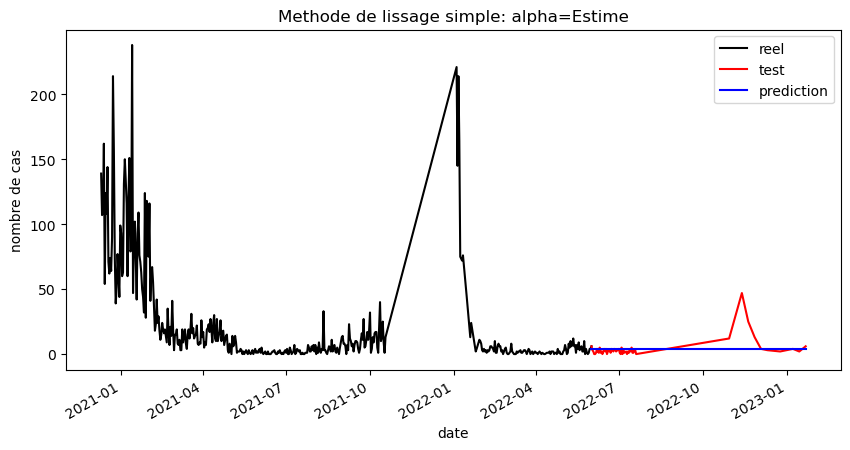

In [528]:
ax2 = X_train.plot(color='black', figsize=(10,5))
X_test.plot(ax=ax2, color='red')
y_pred3.plot(ax=ax2, color='blue', legend=True)
ax2.legend(("reel", "test", "prediction"))
ax2.set_ylabel("nombre de cas")
ax2.set_title("Methode de lissage simple: alpha=Estime")

Text(0.5, 1.0, 'Methode de lissage simple: alpha=0.6')

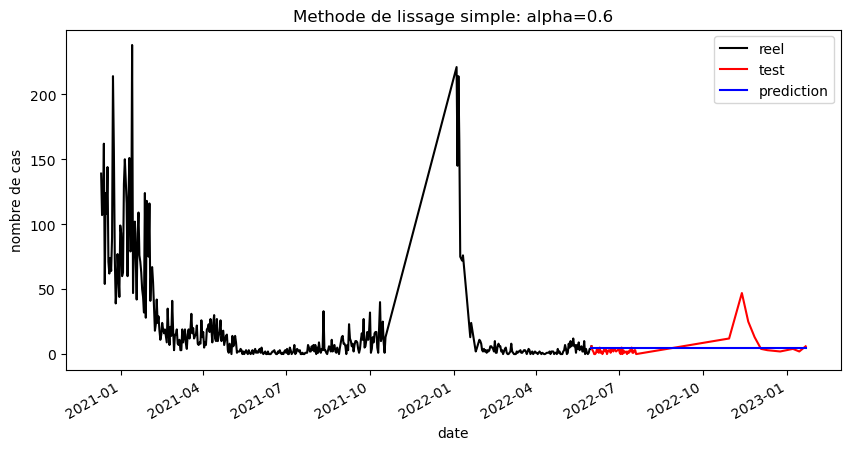

In [529]:
ax1 = X_train.plot(color='black', figsize=(10,5))
X_test.plot(ax=ax1, color='red')
y_pred2.plot(ax=ax1, color='blue', legend=True)
ax1.legend(("reel", "test", "prediction"))
ax1.set_ylabel("nombre de cas")
ax1.set_title("Methode de lissage simple: alpha=0.6")


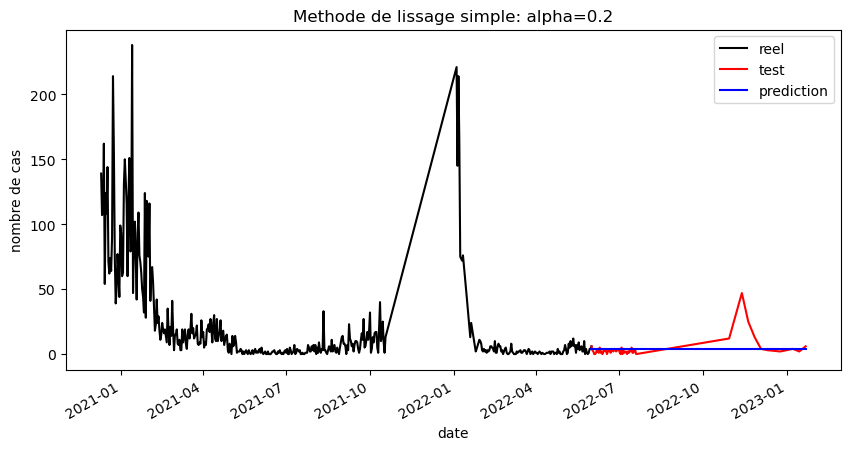

In [530]:
ax = X_train.plot(color='black', figsize=(10,5))
X_test.plot(ax=ax, color='red')
y_pred1.plot(ax=ax, color='blue', legend=True)
ax.legend(("reel", "test", "prediction"))
ax.set_ylabel("nombre de cas")
ax.set_title("Methode de lissage simple: alpha=0.2")
plt.show()

On constate que la variation de la valeur de alpha dans notre cas n'améliore pas le modèle. Tous ces modèles donnent un mauvais résultat et n'arrive pas à suivre convenablement l'évolution de cette maladie de covid 19.

***Calcul des Erreurs***

In [531]:
rms1 = np.sqrt(mean_squared_error(X_test , y_pred1 ))
rms2= np.sqrt(mean_squared_error(X_test , y_pred2 ))
rms3 = np.sqrt(mean_squared_error(X_test , y_pred3 ))

print('SE alpha=0.2:',rms1)
print('SE alpha=0.6:,',rms2)
print('SE alpha=Estime:',rms3)


SE alpha=0.2: 6.907135271506697
SE alpha=0.6:, 6.9942105460511845
SE alpha=Estime: 6.915422625073035


***Enregistrement de la performance: on utilisera le meilleur***

In [532]:
new_row = pd.Series(data={'modele':'Lissage exp simple', 'error':rms1})
tab_comparaison = tab_comparaison.append(new_row, ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14228\445071935.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_comparaison = tab_comparaison.append(new_row, ignore_index=True)


**2) Lissage exponentiel Double**

In [533]:
df = pd.read_excel("dataCovid19.xlsx", 
                index_col="date",parse_dates=True)
df.rename(columns={'nombre':'nbre_cas'}, inplace=True)

In [534]:
X_train = df[:'2022-06-01']
X_test = df['2022-06-01':]

**Modèle non saisonniare**

***Entrainement***

Entraitement du mpdèle sur les données test en faisant varier les valaurs de aplha et de beta

In [535]:
holt_ns = Holt(X_train).fit(smoothing_level=0.8, smoothing_slope=0.2,optimized=False)
holt_nsf = Holt(X_train,damped=True ).fit()
holt_dam = Holt(X_train, damped=True).fit(smoothing_level=0.4,smoothing_slope=0.5)

c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Local\Temp\ipykernel_14228\854406366.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_ns = Holt(X_train).fit(smoothing_level=0.8, smoothing_slope=0.2,optimized=False)
C:\Users\DELL\AppData\Local\Temp\ipykernel_14228\854406366.py:2: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  holt_nsf = Holt(X_train,damped=True ).fit()
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Local\Temp\ipykernel_14228\854406366.p

***Visualisation et prediction du modèle***

In [536]:
#alpha =0.8 et beta =0.2
fcast_hold_l = holt_ns.forecast(len(X_test) ).rename("Holt's linear trend")
y_pred1 = pd.DataFrame({})
y_pred1["nbre_cas"] = fcast_hold_l
y_pred1 = y_pred1.set_index(X_test.iloc[0:len(X_test),:].index)

#alpha =Estime et beta =Estime
fcast_hold_lf = holt_nsf.forecast( len(X_test) ).rename("Holt's linear trend optimised")
y_pred2 = pd.DataFrame({})
y_pred2["nbre_cas"] = fcast_hold_lf
y_pred2 = y_pred1.set_index(X_test.iloc[0:len(X_test),:].index)

#alpha =0.8 et beta=0.2 : Dam
fcast_dam = holt_dam.forecast( len(X_test) ).rename("Additive damped trend(dampinf optimise)")
y_pred3 = pd.DataFrame({})
y_pred3["nbre_cas"] = fcast_dam
y_pred3= y_pred1.set_index(X_test.iloc[0:len(X_test),:].index)

c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


***Visualisation du modèle***

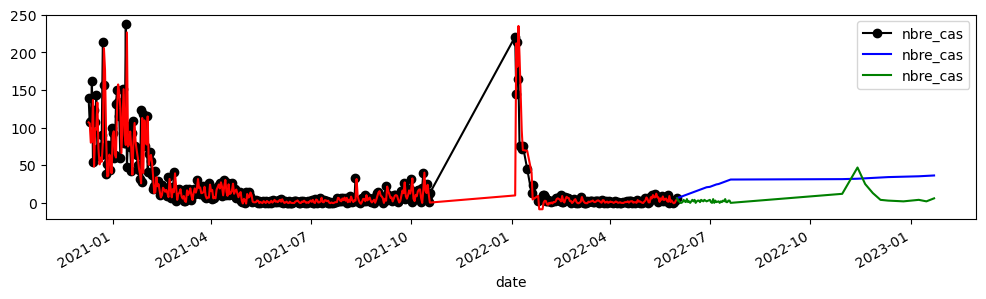

In [537]:
ax = X_train.plot(color="black",marker="o",figsize=(12,3))
holt_ns.fittedvalues.plot(ax=ax,color='red')
y_pred1.plot(ax=ax, color='blue', legend=True)
X_test.plot(ax=ax, color="green", legend=True)
plt.show()

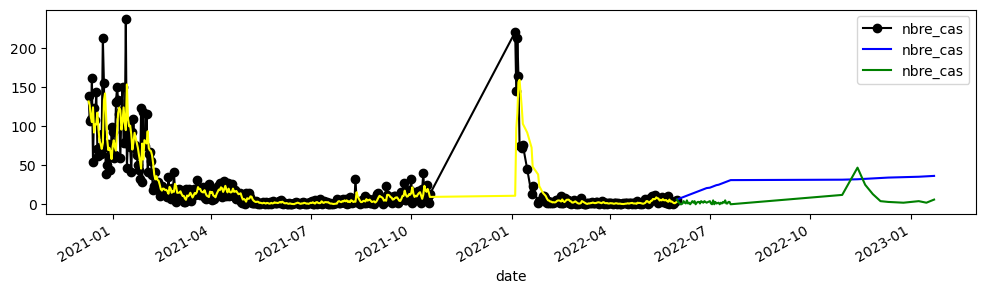

In [538]:
ax2 = X_train.plot(color="black",marker="o",figsize=(12,3))
holt_nsf.fittedvalues.plot(ax=ax2,color='yellow')
y_pred2.plot(ax=ax2, color='blue', legend=True)
X_test.plot(ax=ax2, color="green", legend=True)
plt.show()

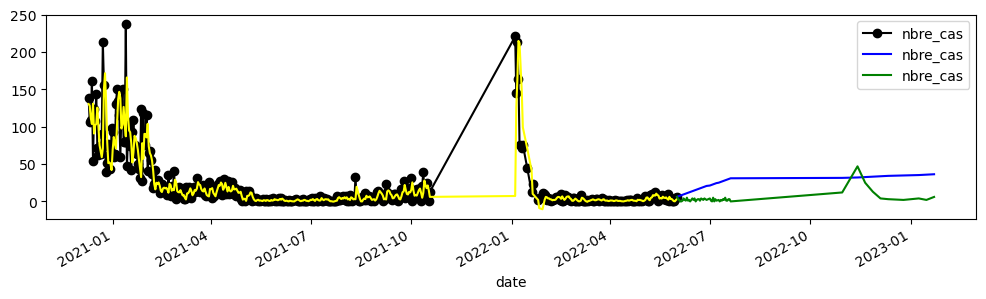

In [539]:
ax3 = X_train.plot(color="black",marker="o",figsize=(12,3))
holt_dam.fittedvalues.plot(ax=ax3,color='yellow')
y_pred3.plot(ax=ax3, color='blue', legend=True)
X_test.plot(ax=ax3, color="green", legend=True)
plt.show()

***Calcul des Erreurs***

In [540]:
rms1 = np.sqrt(mean_squared_error(X_test , y_pred1 ))
rms2= np.sqrt(mean_squared_error(X_test , y_pred2 ))
rms3 = np.sqrt(mean_squared_error(X_test , y_pred3 ))

print('SE alpha=0.2:',rms1)
print('SE alpha=0.6:,',rms2)
print('SE alpha=Estime:',rms3)

SE alpha=0.2: 19.82481588344106
SE alpha=0.6:, 19.82481588344106
SE alpha=Estime: 19.82481588344106


***Enregistrement de la performance du modèle***

In [541]:
new_row = pd.Series(data={'modele':'Hot', 'error':rms3})
tab_comparaison = tab_comparaison.append(new_row, ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14228\2932501418.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_comparaison = tab_comparaison.append(new_row, ignore_index=True)


**Methode Avec saisonnalité**

In [542]:
df = pd.read_excel("dataCovid19.xlsx", index_col="date",parse_dates=True)
df.rename(columns={'nombre':'nbre_cas'}, inplace=True)

In [543]:
X_train = df[:'2022-06-01']
X_test = df['2022-06-01':]

***Modèle Multiplicative et Additive sans optimisation***

In [544]:
X_train[X_train["nbre_cas"].values == 0] = 0.000001

In [545]:
fit1 = ExponentialSmoothing(X_train, seasonal_periods=4, 
                            trend='add',seasonal='add').fit()

fit2 = ExponentialSmoothing(X_train, seasonal_periods=4,
                            trend='mul',seasonal='mul').fit()

c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


***Modèle Multiplicative et Additive avec optimisation***

In [546]:

fit3 = ExponentialSmoothing(X_train, seasonal_periods=4, trend='add',
                            seasonal='add', damped=True).fit()

fit4 = ExponentialSmoothing(X_train, seasonal_periods=4, trend='add',
                            seasonal='mul', damped=True).fit()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14228\2622585767.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit3 = ExponentialSmoothing(X_train, seasonal_periods=4, trend='add',seasonal='add', damped=True).fit()
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Local\Temp\ipykernel_14228\2622585767.py:2: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit4 = ExponentialSmoothing(X_train, seasonal_periods=4, trend='add',seasonal='mul', damped=True).fit()
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates

***Resumé des hyperparamètres determinés pour chaque méthode***

In [547]:
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",
                            r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])

params = ['smoothing_level', 'smoothing_trend', 'damping_trend',
        'smoothing_seasonal', 'initial_level', 'initial_trend']

results["Additive"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"] = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]
results


,Additive,Multiplicative,Additive Dam,Multiplica Dam
$\alpha$,0.411199,0.300524,0.417411,0.323209
$\beta$,0.000003,0.000111,0.000000,0.000100
$\phi$,NaN,NaN,0.851008,0.990000
$\gamma$,0.000217,0.000114,0.000104,0.000110
$l_0$,125.549528,122.518029,131.574389,124.724430
$b_0$,-0.293531,0.957284,-8.416369,-4.479303
SSE,209573.679206,203647.136162,209084.505573,210504.061529


***Modèle sans optimisation***

In [548]:
add_sai = fit1.forecast(len(X_test)
            ).rename('Holt-Winters (additive avec saisonnalite)')
y_pred1 = pd.DataFrame({})
y_pred1["nbre_cas"] = add_sai
y_pred1 = y_pred1.set_index(X_test.iloc[0:len(X_test),:].index)

mul_pl = fit2.forecast(len(X_test)).rename(
    'Holt-Winters (add-mul-seasonal)')

y_pred2 = pd.DataFrame({})
y_pred2["nbre_cas"] = mul_pl
y_pred2 = y_pred2.set_index(X_test.iloc[0:len(X_test),:].index)

c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


***Visualisation du modèle sans optimisation***

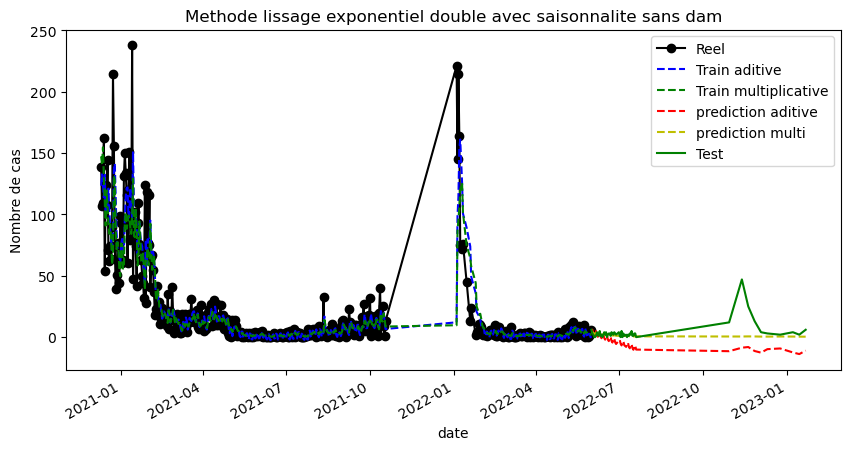

In [549]:
ax = X_train.plot(figsize=(10,5), marker='o', color='black', 
    title="Methode lissage exponentiel double avec saisonnalite sans dam" )
ax.set_ylabel("Nombre de cas")

fit1.fittedvalues.plot(ax=ax, style='--', color='b')
fit2.fittedvalues.plot(ax=ax, style='--', color='green')

y_pred1.plot(ax=ax,style='--', color='red', legend=True)
y_pred2.plot(ax=ax,style='--', color='y', legend=True)

X_test.plot(ax=ax, color="g")

ax.legend(("Reel","Train aditive","Train multiplicative",
        "prediction aditive","prediction multi","Test"))
plt.show()

***Modèle Avec optimisation***

In [550]:
add_sai = fit3.forecast(len(X_test)).rename(
    'Holt-Winters (additive avec saisonnalite:Dam)')
y_pred3 = pd.DataFrame({})
y_pred3["nbre_cas"] = add_sai
y_pred3 = y_pred3.set_index(X_test.iloc[0:len(X_test),:].index)

mul_pl = fit4.forecast(len(X_test)).rename(
    'Holt-Winters (add-mul-seasonal):Dam')
y_pred4 = pd.DataFrame({})
y_pred4["nbre_cas"] = mul_pl
y_pred4 = y_pred4.set_index(X_test.iloc[0:len(X_test),:].index)

c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


***Visualisation du modèle***

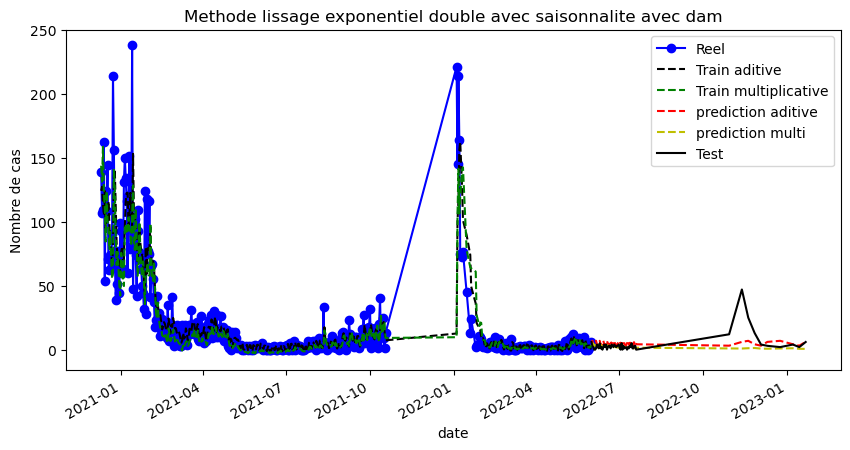

In [551]:
ax = X_train.plot(figsize=(10,5), marker='o', color='b', 
                title="Methode lissage exponentiel double avec saisonnalite avec dam" )
ax.set_ylabel("Nombre de cas")

fit3.fittedvalues.plot(ax=ax, style='--', color='black')
fit4.fittedvalues.plot(ax=ax, style='--', color='green')

y_pred3.plot(ax=ax,style='--', color='red', legend=True)
y_pred4.plot(ax=ax,style='--', color='y', legend=True)

X_test.plot(ax=ax, color="black")

ax.legend(("Reel","Train aditive","Train multiplicative",
        "prediction aditive","prediction multi","Test"))
plt.show()

***Calcul de l'erreur***

In [552]:
rms1 = np.sqrt(mean_squared_error(X_test , y_pred1 ))
rms2= np.sqrt(mean_squared_error(X_test , y_pred2 ))
rms3 = np.sqrt(mean_squared_error(X_test , y_pred3 ))
rms4 = np.sqrt(mean_squared_error(X_test , y_pred4 ))

print("SE seasonal_periods=4, trend='add',seasonal='add:",rms1)
print("SE seasonal_periods=4, trend='mul',seasonal='mul':",rms2)
print("SE seasonal_periods=4, trend='add',seasonal='add' dam:True, :",rms3)
print("SE trend='add',seasonal='mul', damped=True :",rms4)

SE seasonal_periods=4, trend='add',seasonal='add: 12.282479402449987
SE seasonal_periods=4, trend='mul',seasonal='mul': 7.570835039603797
SE seasonal_periods=4, trend='add',seasonal='add' dam:True, : 7.012518086030099
SE trend='add',seasonal='mul', damped=True : 7.441283885592515


***Enregistrement de la performance du modèle***

In [553]:
new_row = pd.Series(data={'modele':'Hot-Winters', 'error':rms3})
tab_comparaison = tab_comparaison.append(new_row, ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14228\2756936611.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_comparaison = tab_comparaison.append(new_row, ignore_index=True)


**2) Modèle de ARMA**

***Modèle AR***

***Librairies***

In [554]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf


In [555]:
df = pd.read_excel("dataCovid19.xlsx", index_col="date",parse_dates=True)
df.rename(columns={'nombre':'nbre_cas'}, inplace=True)

***Normalisation et division du dataset***

In [556]:
X_train,X_test = df[:'2022-06-01'],df['2022-06-01':] # division du df

X_train["nbre_cas"], mean, std = normalize(X_train.nbre_cas)

***Verifions l'existance de la saisonnalité***

Une condition d'utilisation de cette methode est que les données aient une saisonnalité 

In [557]:

is_saisonnalite = adfuller(df['nbre_cas'], autolag='AIC')

In [558]:
is_saisonnalite[1]

0.07727968498451636

La valeur du p-value est superieur à 0.05 il y a pas de saisonnalité la méthode n'est donc pas adapté. 

***Implementation du modele AR***

Determinons de l'ordre P du modèle

Autocorrélation partielle

c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


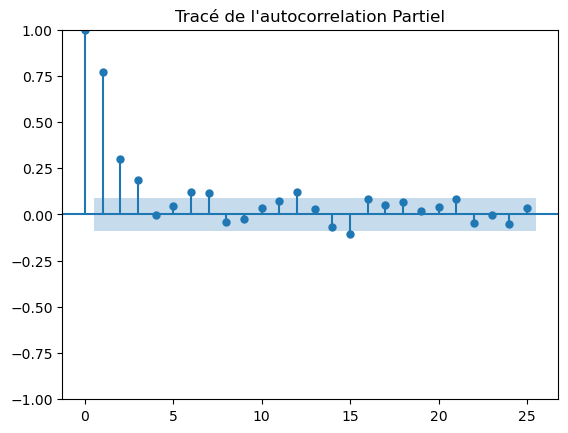

In [559]:
pacf = plot_pacf(df['nbre_cas'], lags=25,
                title="Tracé de l'autocorrelation Partiel")

On comptabilise que P=8

In [560]:
# division du dataset
X_train,X_test = df[:'2022-06-01'],df['2022-06-01':] # division du df

# initialisation de p
p=8

***Normalisation des données***

In [561]:
#Normalisationn des données
X_train["nbre_cas"], mean, std = normalize(X_train.nbre_cas)

***Creation du modèle***

In [562]:
# entrainement du modèle AR
model_AR = AutoReg(X_train["nbre_cas"],lags=8).fit()

c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


***bilan de l'entrainement***

In [563]:
model_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             AutoReg Model Results                             
===============================================================================
Dep. Variable:                nbre_cas   No. Observations:                  441
Model:                      AutoReg(8)   Log Likelihood                -360.399
Method:                Conditional MLE   S.D. of innovations              0.556
Date:              dim., 26 févr. 2023   AIC                            740.799
Time:                         00:10:35   BIC                            781.506
Sample:                              8   HQIC                           756.868
                                   441                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0219      0.027     -0.819      0.413      -0.074       0.031
nbre_cas.L1     0.4636      0.048      9.714      0.000       0.370       0.557
nbre_cas.L2     0.1556      0.052      2.979      0.003       0.053       0.258
nbre_cas.L3     0.1587      0.052      3.024      0.002       0.056       0.262
nbre_cas.L4    -0.0422      0.052     -0.811      0.417      -0.144       0.060
nbre_cas.L5    -0.0603      0.051     -1.176      0.240      -0.161       0.040
nbre_cas.L6     0.0860      0.051      1.693      0.091      -0.014       0.186
nbre_cas.L7     0.1179      0.050      2.351      0.019       0.020       0.216
nbre_cas.L8    -0.0053      0.046     -0.116      0.908      -0.095       0.085
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0552           -0.0000j            1.0552           -0.0000
AR.2            0.9529           -0.9318j            1.3328           -0.1232
AR.3            0.9529           +0.9318j            1.3328            0.1232
AR.4           -0.3944           -1.2735j            1.3332           -0.2978
AR.5           -0.3944           +1.2735j            1.3332            0.2978
AR.6           -1.4288           -0.6543j            1.5715           -0.4317
AR.7           -1.4288           +0.6543j            1.5715            0.4317
AR.8           22.7662           -0.0000j           22.7662           -0.0000
-----------------------------------------------------------------------------
"""

***Prediction***

In [564]:
y_pred = pd.DataFrame({})
y_pred["nbre_cas"]= model_AR.predict(start=len(X_train), 
            end=(len(X_train)+len(X_test)-1), dynamic=False)
y_pred = y_pred.set_index(X_test.index)

c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


***Denormalisation pour l'affichage***

In [565]:
y_pred["nbre_cas"]= denormalize(y_pred.nbre_cas, mean, std)
X_train["nbre_cas"]= denormalize(X_train.nbre_cas, mean, std)

***Visualisation du modèle*** 

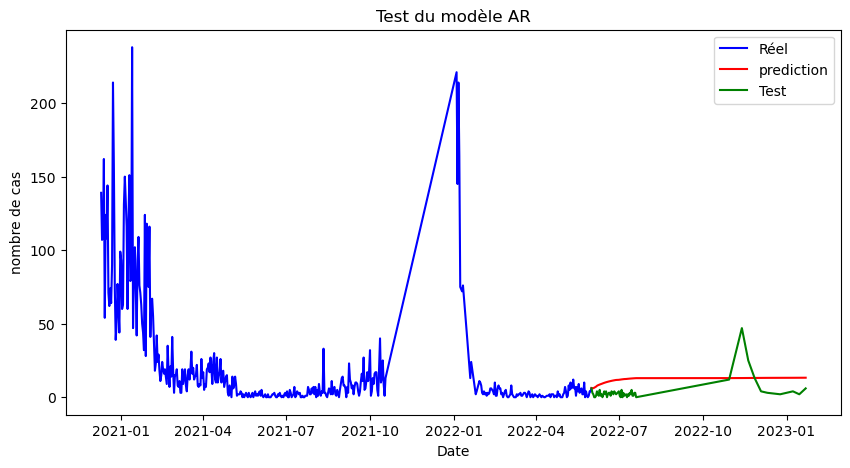

In [566]:
plt.figure(1,figsize=(10,5))
plt.plot(X_train.index, X_train, color='b')
plt.plot(y_pred.index, y_pred, color='r')

plt.plot(X_test, color="g")
plt.title("Test du modèle AR")
plt.xlabel("Date")
plt.ylabel("nombre de cas")

plt.legend(("Réel", "prediction", "Test"))
plt.show()

Le modèle AR semble ne  pas convenir au problème de covid 19

***Evaluer performance le model***

In [567]:
rmse = mean_squared_error(X_test, y_pred)

In [568]:
rmse

97.03629181466343

***Enregistement des performance du modèle***

In [569]:
new_row = pd.Series(data={'modele':'AR', 'error':rmse})
tab_comparaison = tab_comparaison.append(new_row, ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14228\2851671223.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_comparaison = tab_comparaison.append(new_row, ignore_index=True)


**Modèle ARMA**

In [570]:
from statsmodels.tsa.arima.model import ARIMA 

In [571]:
df = pd.read_excel("dataCovid19.xlsx",
                index_col="date",parse_dates=True)
df.rename(columns={'nombre':'nbre_cas'}, inplace=True)

In [572]:
X_train,X_test = df[:'2022-06-01'],df['2022-06-01':] # division du df

X_train["nbre_cas"], mean, std = normalize(X_train.nbre_cas)

Nous avons deja grace p-value calculer cidessous que la serie n'est pas saisonniere. ARMA semble être un modèle de choix pour ce problème
Par ailleur nous avons deja determine la valeur de P=8, determinons la valeur de q et de d

***Determination de l'ordre de MA : q***

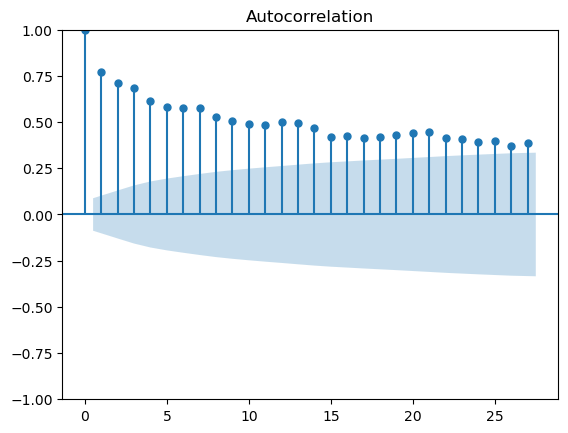

In [573]:
plot_acf(df['nbre_cas'])  
plt.show()  

***ARMA d=0***

In [574]:
model_ARMA = ARIMA(X_train["nbre_cas"],order=(8,0,26)).fit()

c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parame

***bilan d'entrainement***

In [575]:
model_ARMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:                nbre_cas   No. Observations:                  441
Model:                 ARIMA(8, 0, 26)   Log Likelihood                -359.171
Date:              dim., 26 févr. 2023   AIC                            790.341
Time:                         00:11:36   BIC                            937.547
Sample:                              0   HQIC                           848.408
                                 - 441                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0853      2.329     -0.037      0.971      -4.650       4.479
ar.L1          0.0174      1.172      0.015      0.988      -2.279       2.314
ar.L2         -0.2902      1.228     -0.236      0.813      -2.697       2.116
ar.L3          0.0464      1.051      0.044      0.965      -2.014       2.107
ar.L4          0.2035      0.685      0.297      0.767      -1.140       1.547
ar.L5          0.0459      0.882      0.052      0.958      -1.682       1.774
ar.L6          0.2752      0.916      0.300      0.764      -1.521       2.071
ar.L7          0.1252      0.847      0.148      0.883      -1.535       1.786
ar.L8          0.5597      0.638      0.877      0.380      -0.691       1.810
ma.L1          0.4435      1.185      0.374      0.708      -1.880       2.767
ma.L2          0.6760      0.908      0.745      0.457      -1.104       2.456
ma.L3          0.5609      0.820      0.684      0.494      -1.047       2.169
ma.L4          0.1734      0.896      0.194      0.847      -1.583       1.930
ma.L5          0.1942      0.702      0.277      0.782      -1.182       1.570
ma.L6         -0.0768      0.856     -0.090      0.929      -1.755       1.601
ma.L7         -0.0129      0.613     -0.021      0.983      -1.214       1.189
ma.L8         -0.5202      0.520     -1.000      0.317      -1.540       0.500
ma.L9         -0.2198      0.188     -1.171      0.241      -0.588       0.148
ma.L10        -0.1921      0.143     -1.345      0.179      -0.472       0.088
ma.L11        -0.2832      0.176     -1.613      0.107      -0.627       0.061
ma.L12        -0.0810      0.228     -0.356      0.722      -0.527       0.365
ma.L13        -0.0239      0.158     -0.151      0.880      -0.334       0.286
ma.L14         0.0325      0.126      0.257      0.797      -0.215       0.280
ma.L15        -0.0784      0.095     -0.827      0.408      -0.264       0.107
ma.L16         0.0179      0.093      0.192      0.848      -0.165       0.201
ma.L17        -0.0692      0.093     -0.745      0.456      -0.251       0.113
ma.L18        -0.0675      0.142     -0.474      0.636      -0.347       0.212
ma.L19         0.0668      0.111      0.600      0.549      -0.152       0.285
ma.L20         0.0010      0.160      0.006      0.995      -0.313       0.315
ma.L21         0.0709      0.184      0.385      0.700      -0.290       0.432
ma.L22        -0.0340      0.169     -0.201      0.841      -0.366       0.298
ma.L23         0.1598      0.145      1.104      0.270      -0.124       0.444
ma.L24        -0.0445      0.192     -0.232      0.816      -0.420       0.331
ma.L25        -0.0260      0.164     -0.158      0.874      -0.348       0.296
ma.L26        -0.0680      0.152     -0.447      0.655      -0.366       0.230
sigma2         0.2937      0.023     13.026      0.000       0.249       0.338
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):     

***Prediction du modèle***

In [576]:
y_pred = pd.DataFrame({})
y_pred["nbre_cas"]= model_ARMA.predict(
    start=len(X_train), end=(len(X_train)+len(X_test)-1), dynamic=False)

y_pred = y_pred.set_index(X_test.index)

c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


***Denormalisation pour affichage***

In [580]:
y_pred["nbre_cas"]= denormalize(y_pred.nbre_cas, mean, std)
X_train["nbre_cas"]= denormalize(X_train.nbre_cas, mean, std)

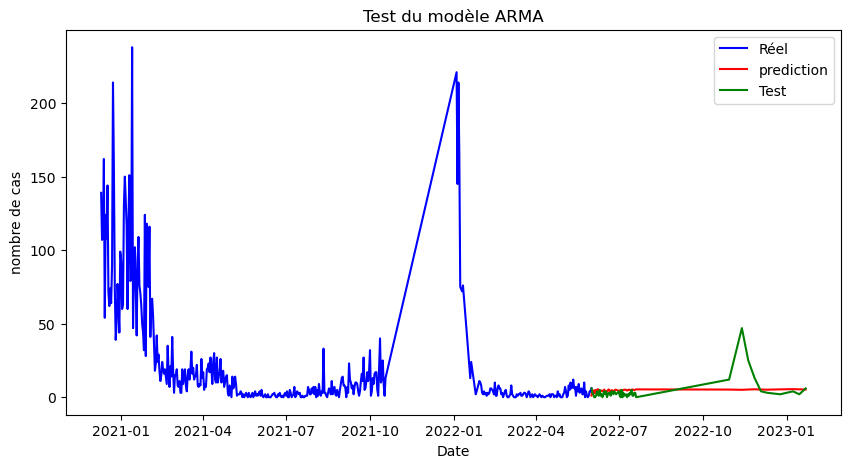

In [582]:
plt.figure(1,figsize=(10,5))
plt.plot(X_train.index, X_train, color='b')
plt.plot(y_pred.index, y_pred, color='r')

plt.plot(X_test, color="g")
plt.title("Test du modèle ARMA")
plt.xlabel("Date")
plt.ylabel("nombre de cas")

plt.legend(("Réel", "prediction", "Test"))
plt.show()

Comme le modèle AR le méthode ARMA fournie un resultat insatisfaisant.

***Calcul de l'erreur***

In [583]:
rmse = mean_squared_error(X_test, y_pred)

In [584]:
rmse

47.358554067887916

***Enregistrement des performances***

In [585]:
new_row = pd.Series(data={'modele':'ARMA', 'error':rmse})
tab_comparaison = tab_comparaison.append(new_row, ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14228\1839032598.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_comparaison = tab_comparaison.append(new_row, ignore_index=True)


**Modèle ARIMA**

In [586]:
from statsmodels.tsa.arima.model import ARIMA  

In [587]:
df = pd.read_excel("dataCovid19.xlsx", index_col="date",parse_dates=True)
df.rename(columns={'nombre':'nbre_cas'}, inplace=True)

In [588]:
X_train,X_test = df[:'2022-06-01'],df['2022-06-01':] # division du df

X_train["nbre_cas"], mean, std = normalize(X_train.nbre_cas)

***Creation du modèle***

ARIMA d=1 pour le modèle ARIMA. P=8, q=26

In [589]:

# Creation  et entrainement du modèle
model_arima = ARIMA(X_train, order = (8, 1, 26))

res  = model_arima.fit()  

res.summary()

c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parame

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:                nbre_cas   No. Observations:                  441
Model:                 ARIMA(8, 1, 26)   Log Likelihood                -357.221
Date:              dim., 26 févr. 2023   AIC                            784.442
Time:                         00:14:26   BIC                            927.479
Sample:                              0   HQIC                           840.870
                                 - 441                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0158      0.812      0.019      0.984      -1.576       1.608
ar.L2         -0.4508      0.705     -0.639      0.523      -1.832       0.931
ar.L3         -0.0282      1.041     -0.027      0.978      -2.068       2.012
ar.L4         -0.0730      1.012     -0.072      0.943      -2.057       1.911
ar.L5          0.0153      0.993      0.015      0.988      -1.931       1.962
ar.L6          0.2964      0.969      0.306      0.760      -1.603       2.196
ar.L7          0.0750      0.695      0.108      0.914      -1.288       1.438
ar.L8          0.7700      0.600      1.284      0.199      -0.406       1.946
ma.L1         -0.5477      1.198     -0.457      0.648      -2.897       1.801
ma.L2          0.3783      1.298      0.291      0.771      -2.166       2.922
ma.L3         -0.1139      1.671     -0.068      0.946      -3.388       3.160
ma.L4         -0.1849      1.595     -0.116      0.908      -3.310       2.940
ma.L5         -0.0811      1.437     -0.056      0.955      -2.897       2.735
ma.L6         -0.3507      1.490     -0.235      0.814      -3.271       2.570
ma.L7          0.1205      1.253      0.096      0.923      -2.336       2.577
ma.L8         -0.8072      1.200     -0.673      0.501      -3.159       1.545
ma.L9          0.4079      0.735      0.555      0.579      -1.033       1.848
ma.L10         0.0552      0.299      0.184      0.854      -0.531       0.642
ma.L11        -0.1115      0.290     -0.385      0.701      -0.680       0.457
ma.L12         0.2313      0.423      0.546      0.585      -0.598       1.061
ma.L13         0.0512      0.523      0.098      0.922      -0.974       1.076
ma.L14         0.0441      0.475      0.093      0.926      -0.886       0.974
ma.L15        -0.1391      0.498     -0.279      0.780      -1.115       0.837
ma.L16         0.1603      0.619      0.259      0.796      -1.053       1.373
ma.L17        -0.1028      0.737     -0.140      0.889      -1.546       1.341
ma.L18        -0.0103      0.824     -0.012      0.990      -1.624       1.604
ma.L19         0.1392      0.801      0.174      0.862      -1.430       1.709
ma.L20        -0.1109      0.677     -0.164      0.870      -1.439       1.217
ma.L21         0.0719      0.588      0.122      0.903      -1.080       1.224
ma.L22        -0.0973      0.536     -0.181      0.856      -1.149       0.954
ma.L23         0.2804      0.473      0.593      0.553      -0.647       1.207
ma.L24        -0.2194      0.312     -0.704      0.481      -0.830       0.391
ma.L25         0.0669      0.117      0.573      0.566      -0.162       0.295
ma.L26        -0.0421      0.102     -0.414      0.679      -0.241       0.157
sigma2         0.2918      0.230      1.269      0.204      -0.159       0.742
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             17886.61
Prob(Q):                              0.87   Prob(JB):        

***Prediction du nombre de cas de covid avec ARIMA***

In [590]:
y_pred = pd.DataFrame({})
y_pred["nbre_cas"]= res.predict(
    start=len(X_train), end=(len(X_train)+len(X_test)-1), dynamic=True)
y_pred = y_pred.set_index(X_test.index)

c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [591]:
y_pred["nbre_cas"]= denormalize(y_pred.nbre_cas, mean, std)
X_train["nbre_cas"]= denormalize(X_train.nbre_cas, mean, std)

***Visualisation du modèle***

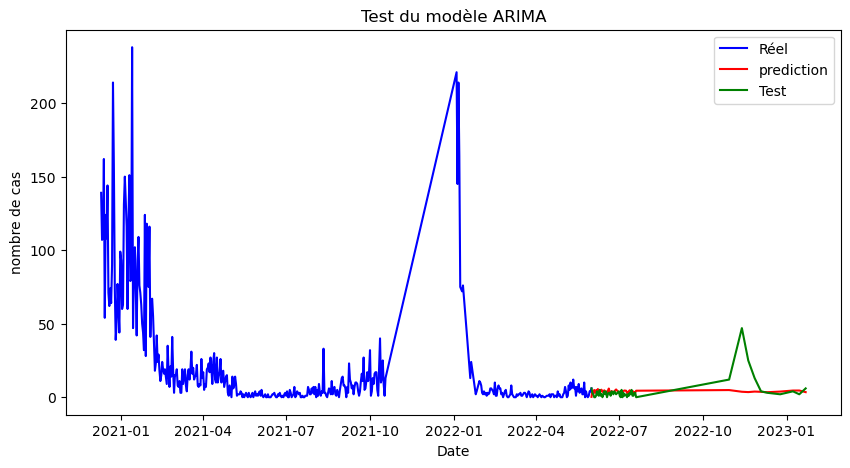

In [592]:
plt.figure(1,figsize=(10,5))
plt.plot(X_train.index, X_train, color='b')
plt.plot(y_pred.index, y_pred, color='r')

plt.plot(X_test, color="g")
plt.title("Test du modèle ARIMA")
plt.xlabel("Date")
plt.ylabel("nombre de cas")

plt.legend(("Réel", "prediction", "Test"))
plt.show()

***Calcul de l'erreur***

In [593]:
rmse = mean_squared_error(X_test, y_pred)

In [594]:
rmse

49.01055314017624

***Enregistrement du modèle ARIMA***

In [595]:
new_row = pd.Series(data={'modele':'ARIMA', 'error':rmse})
tab_comparaison = tab_comparaison.append(new_row, ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14228\1259190540.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_comparaison = tab_comparaison.append(new_row, ignore_index=True)


**Modèle SARIMA**

In [596]:
from statsmodels.tsa.statespace.sarimax import  SARIMAX

In [488]:
df = pd.read_excel("dataCovid19.xlsx", index_col="date",parse_dates=True)
df.rename(columns={'nombre':'nbre_cas'}, inplace=True)

In [489]:
X_train,X_test = df[:'2022-06-01'],df['2022-06-01':] # division du df

X_train["nbre_cas"], mean, std = normalize(X_train.nbre_cas)

Determiner la saisonnalité S pour le model sarima

Creation  et entrainement du modèle

In [504]:
model_sarima = SARIMAX(X_train, order = (8, 1, 26), seasonal_order=(8,0,0,12))

res  = model_sarima.fit()  

res.summary()

ValueError: Invalid model: moving average lag(s) {24, 12} are in both the seasonal and non-seasonal moving average components.

**Conclusion**

**Tableau de comparaison**

In [597]:
tab_comparaison

,modele,error
0,Lissage exp simple,6.907135
1,Hot,19.824816
2,Hot-Winters,7.012518
3,AR,97.036292
4,ARMA,47.358554
5,ARIMA,49.010553


Text(3, 20, '47.358554067887916')

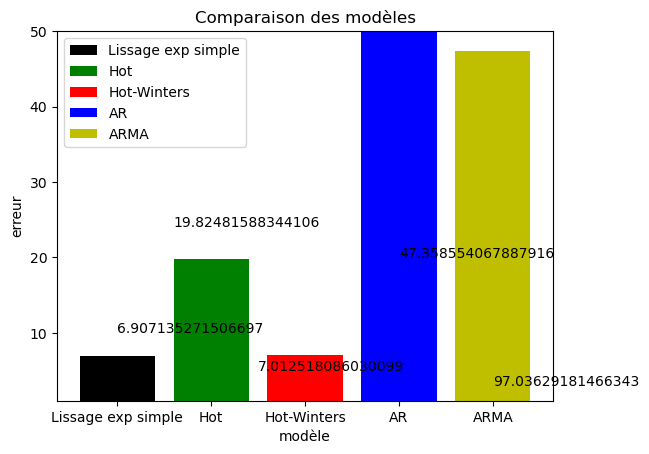

In [619]:
plt.bar(tab_comparaison["modele"][0],tab_comparaison["error"][0],
        color="black")
plt.bar(tab_comparaison["modele"][1],tab_comparaison["error"][1],
        color="g")

plt.bar(tab_comparaison["modele"][2],tab_comparaison["error"][2],
        color='r')
plt.bar(tab_comparaison["modele"][3],tab_comparaison["error"][3],
        color='b')
plt.bar(tab_comparaison["modele"][4],tab_comparaison["error"][4],
        color='y')

plt.ylim(1, 50),
plt.title("Comparaison des modèles")
plt.xlabel("modèle")
plt.ylabel("erreur")
plt.legend(("Lissage exp simple","Hot", "Hot-Winters", "AR", "ARMA"))

plt.text(0,10, str(tab_comparaison["error"][0]))
plt.text(0.6,24, str(tab_comparaison["error"][1]))
plt.text(   1.5,5, str(tab_comparaison["error"][2]))
plt.text(   4,3, str(tab_comparaison["error"][3]))
plt.text(   3,20, str(tab_comparaison["error"][4]))


**A L'issue de  cette analyse on peux dire que le lissage exponentiel simple est le meilleur modèle avec un taux d'erreur de 6.90.**

## Conclusion génerale de l'étude

Cette étude nous a été trés benefique. il nous a permis d'expérimenter l'ensemble des connaissances théoriques que nous avons vu en classe. A l'issu de implémentation des divers modéles que nous avons étudié, il ressort que le mielleur modèle representant de l'évolution du nombre de cas de covid 19 est le lissage exponentiel double que nous avons même implémenter la fonction. Cependant qu'est ce qui pourrais justifié ce meilleur résultat par rapport à leur équivalent intégrés à la librairie python statsmodel?  